# Análise Exploratória dos Dados - IMDB

## Autor: Felipe Alves

Começarei fazendo o import das bibliotecas necessárias para uma breve análise dos dados contidos no arquivo csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/desafio_indicium_imdb.csv")
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


Ao dar uma espiada nos dados utilizando o .head(), podemos perceber a existência da coluna "Unnamed: 0", que está como uma coluna de índice, ela não será útil na nossa análise. Por isso, estarei removendo-a.
Além disso, o tipo de Runtime, Released_Year e de Gross não são dados numéricos, o que impossibilita o cálculo de média, o plotamento de gráficos, ou o uso desses dados em modelos. Por este motivo, os transformarei em dados do tipo float.

In [4]:
df = df.drop(columns=['Unnamed: 0'])
df["Runtime"] = df["Runtime"].str.extract(r"(\d+)").astype(float)
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")
df["Gross"] = (df["Gross"].replace(",", "", regex=True).astype(float))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  998 non-null    float64
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    float64
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    float64
dtypes: float64(5), int64(1), object(9)
memory usage: 117.2+ KB


Com os tipos tratados, agora, tratarei das colunas com linhas nulas, que é o caso da: Released_Year, Certificate, Meta_Score e Gross.
Para Released_Year, como apenas uma é nula, ela não afetará tanto a análise, por isso, apenas descartarei o registro como um todo.
Para Certificate, criarei uma categoria Unknown, que mostra que a classificação não foi informada.
Para Meta_Score, irei preencher os faltantes com a média de avaliação dos gêneros que pertencem.

In [6]:
df = df.dropna(subset=["Released_Year"])
df["Certificate"] = df["Certificate"].fillna("Unknown")

df['Primary_Genre'] = df['Genre'].str.split(',').str[0].str.strip()
df['Meta_score'] = df.groupby('Primary_Genre')['Meta_score'].transform(
    lambda x: x.fillna(x.mean())
)

df['Gross'] = df['Gross'].astype(str).str.replace(',', '', regex=False)
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

df['has_gross'] = df['Gross'].notna().astype(int)

df['Gross'] = df['Gross'].fillna(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   998 non-null    object 
 1   Released_Year  998 non-null    float64
 2   Certificate    998 non-null    object 
 3   Runtime        998 non-null    float64
 4   Genre          998 non-null    object 
 5   IMDB_Rating    998 non-null    float64
 6   Overview       998 non-null    object 
 7   Meta_score     996 non-null    float64
 8   Director       998 non-null    object 
 9   Star1          998 non-null    object 
 10  Star2          998 non-null    object 
 11  Star3          998 non-null    object 
 12  Star4          998 non-null    object 
 13  No_of_Votes    998 non-null    int64  
 14  Gross          998 non-null    float64
 15  Primary_Genre  998 non-null    object 
 16  has_gross      998 non-null    int32  
dtypes: float64(5), int32(1), int64(1), object(10)
memory usage:

Aqui, percebemos que ainda faltam 2 linhas no Meta_Score. Isso se dá pelo fato de que nem todos os gêneros tem notas definidas. Dessa forma, para esses 2 casos, imputarei a média global das avaliações.

In [8]:
df['Meta_score'] = df['Meta_score'].fillna(df['Meta_score'].mean())

Agora, com todos os dados devidamente transformados, farei alguns gráficos e começarei a responder as perguntas.

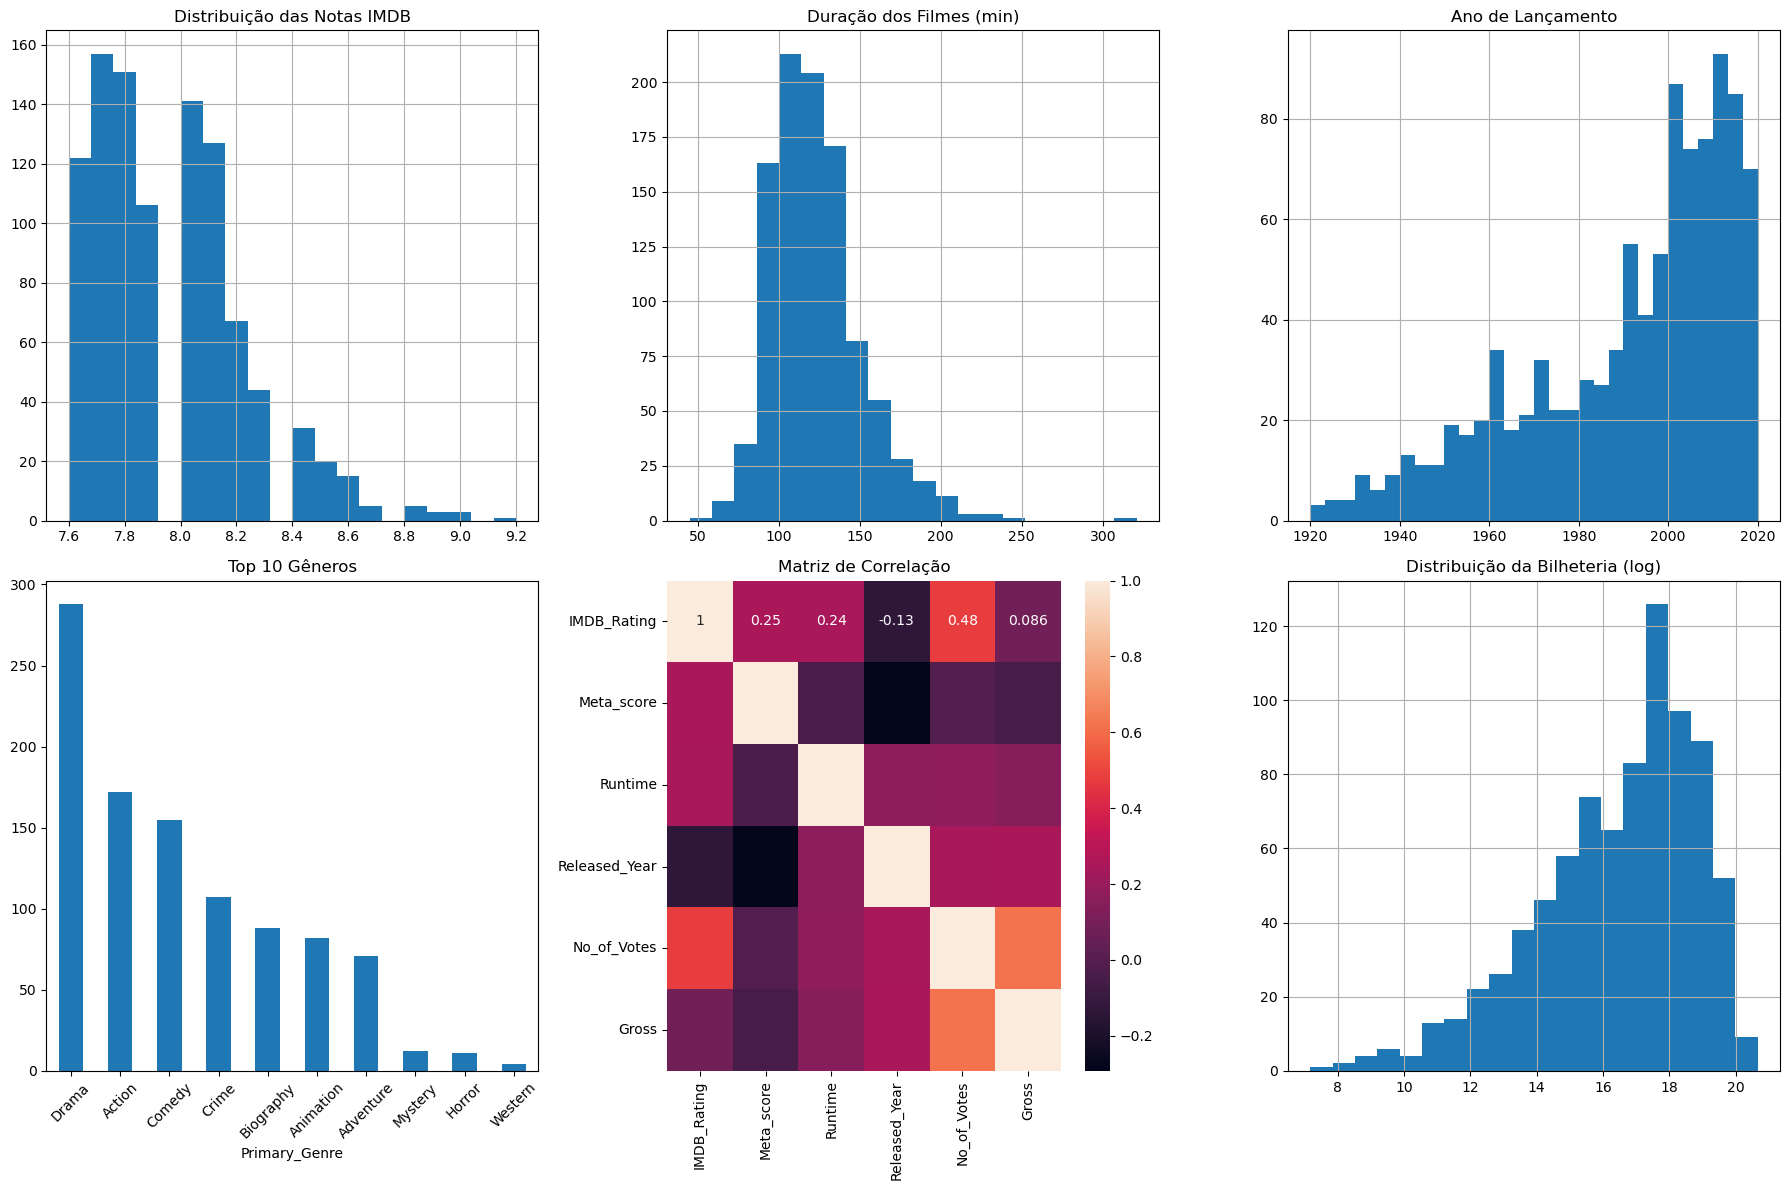

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

df['IMDB_Rating'].hist(bins=20, ax=axes[0,0])
axes[0,0].set_title('Distribuição das Notas IMDB')

df['Runtime'].hist(bins=20, ax=axes[0,1])
axes[0,1].set_title('Duração dos Filmes (min)')

df['Released_Year'].hist(bins=30, ax=axes[0,2])
axes[0,2].set_title('Ano de Lançamento')

top_genres = df['Primary_Genre'].value_counts().head(10)
top_genres.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Top 10 Gêneros')
axes[1,0].tick_params(axis='x', rotation=45)

numeric_cols = ['IMDB_Rating', 'Meta_score', 'Runtime', 'Released_Year', 'No_of_Votes', 'Gross' ]
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, ax=axes[1,1])
axes[1,1].set_title('Matriz de Correlação')

# Aqui, descartei os valores 0 de bilheteria para deixar o gráfico mais limpo.
# Escolhi esse tratamento porque o gross não sera usado no modelo de predição.
df['Gross_log'] = np.nan
# Transformei em log para normalizar os dados e evitar uma diferença discrepante, revelando melhor os padrões de bilheteria.
df.loc[df['Gross'] > 0, 'Gross_log'] = np.log(df.loc[df['Gross'] > 0, 'Gross'])
df['Gross_log'].dropna().hist(bins=20, ax=axes[1,2])
axes[1,2].set_title('Distribuição da Bilheteria (log)')

plt.tight_layout()
plt.show()

### Interpretação dos Gráficos
- Distribuição das Notas IMDB:
A maioria dos filmes tem notas entre 7,5 e 8,2, mostrando que o dataset contém, em geral, filmes bem avaliados.

- Duração dos Filmes (Runtime):
Grande maioria dos filmes possuem entre 100 a 150 minutos. Pelo gráfico, aparenta ter filmes com mais de 300 minutos de duração. Cabe uma investigação para ver se isso confere.

- Ano de Lançamento: 
Tendência de crescimento na produção a partir da década de 1970, acelerando após os anos 2000.

- Top 10 Gêneros:
Drama, Action e Comedy são os gêneros mais frequentes.

- Matriz de Correlação:  
A variável No_of_Votes é a mais correlacionada com a nota IMDB_Rating (0.48). Também há correlação positiva entre Meta_score e IMDB_Rating (0.25).

- Distribuição da Bilheteria (log):
A maioria dos filmes com bilheteria registrada está entre 10 e 20 no log (≈ milhões a centenas de milhões de dólares).  

In [10]:
over_300min_movies = df.query('Runtime > 300')
print(over_300min_movies)

           Series_Title  Released_Year Certificate  Runtime  \
139  Gangs of Wasseypur         2012.0           A    321.0   

                     Genre  IMDB_Rating  \
139  Action, Comedy, Crime          8.2   

                                              Overview  Meta_score  \
139  A clash between Sultan and Shahid Khan leads t...        89.0   

           Director           Star1         Star2                Star3  \
139  Anurag Kashyap  Manoj Bajpayee  Richa Chadha  Nawazuddin Siddiqui   

                Star4  No_of_Votes  Gross Primary_Genre  has_gross  Gross_log  
139  Tigmanshu Dhulia        82365    0.0        Action          0        NaN  


De fato, existe um filme com 321 minutos de duração. Se trata de um filme indiano composto de duas partes, por isso a longa duração.

## Qual filme você recomendaria para uma pessoa que você não conhece?

Como não conheço a pessoa a quem vou recomendar o filme, adotei a seguinte lógica:
- Escolher somente filmes com classificação etária livre (U/UA), garantindo adequação a qualquer idade.
- Priorizar filmes recentes, não porque filmes antigos sejam ruins, mas porque a chance de aceitação é mais alta. Filmes antigos podem ser mais nichados. Além disso, considerar apenas obras com nota IMDB elevada e alto número de votos, já que isso reflete popularidade e qualidade percebida por um público amplo.
- Selecionar opções dentro dos gêneros mais frequentes do dataset (Drama, Ação e Comédia), maximizando a chance de atender diferentes perfis de gosto.
- Indicar uma opção por gênero, permitindo que a pessoa escolha de acordo com seu gosto pessoal.

In [11]:
df_recomendados = df[df['Certificate'].isin(['U', 'UA'])].copy()
df_recomendados = df_recomendados[df_recomendados['Released_Year'] >= 2000]
votos_q3 = df_recomendados['No_of_Votes'].quantile(0.75)
df_recomendados = df_recomendados[
    (df_recomendados['IMDB_Rating'] >= 8.0) & 
    (df_recomendados['No_of_Votes'] >= votos_q3)
]
generos_selecionados = ['Drama', 'Action', 'Comedy']
df_recomendados['Primary_Genre'] = df_recomendados['Genre'].str.split(',').str[0].str.strip()
df_recomendados = df_recomendados[df_recomendados['Primary_Genre'].isin(generos_selecionados)]

melhores_filmes = (
    df_recomendados.sort_values(['IMDB_Rating', 'No_of_Votes'], ascending=[False, False])
    .groupby('Primary_Genre')
    .head(1)
)

print(melhores_filmes[['Series_Title', 'Released_Year', 'Certificate', 'IMDB_Rating', 'No_of_Votes', 'Primary_Genre']])

       Series_Title  Released_Year Certificate  IMDB_Rating  No_of_Votes  \
1   The Dark Knight         2008.0          UA          9.0      2303232   
35     The Prestige         2006.0           U          8.5      1190259   
95           Snatch         2000.0          UA          8.3       782001   

   Primary_Genre  
1         Action  
35         Drama  
95        Comedy  


Dessa forma, está respondida a pergunta. Para cada um dos principais gêneros teria uma recomendação diferente.
  - Para Ação: The Dark Knight
  - Para Drama: The Prestige
  - Para Comédia: Snatch

## Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme? 

- Nossa análise de correlação, complementada por gráficos exploratórios, revela que: o número de votos do público é o principal fator para um número alto nas bilheterias. Filmes que conseguem ampla audiência e são bem avaliados por ela tendem a arrecadar mais.

- Paralelamente, observamos um impacto distinto dos gêneros. Títulos de Ação e Aventura, por exemplo, demonstram uma forte associação com receitas elevadas, ao passo que dramas e biografias, em geral, apresentam um desempenho financeiro mais modesto.

- O ano de lançamento também se mostra importante. Filmes mais recentes consistentemente registram valores de bilheteria superiores, uma tendência que reflete o crescente domínio dos blockbusters no cenário cinematográfico atual.

- Curiosamente, o Meta_score exibe uma correlação bastante baixa com a arrecadação. Isso sugere que, no fim das contas, o sucesso de crítica nem sempre se traduz em um grande retorno financeiro nos cinemas. Isso diz muito sobre como a arte é subjetiva e nem tudo que agrada a grande massa é "tecnicamente" bom (o que não significa muito).

## Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

In [12]:
# Escolhi os principais gêneros apenas para demonstrar que é sim possível inferir o gênero a partir da coluna
generos = ['Drama', 'Action', 'Comedy', 'Crime']

for genero in generos:
    filmes_genero = df[df['Primary_Genre'] == genero]['Overview'].dropna()

    texto = ' '.join(filmes_genero).lower()

    print(f"Palavras que mais aparecem em filmes de {genero}")

    # Palavras-chave comuns de aparecerem nos gêneros procurados
    palavras_chave = ['war', 'battle', 'fight', 'love', 'family', 'murder', 'police',
                     'life', 'death', 'crime', 'comedy', 'funny', 'romance', 'action']

    for palavra in palavras_chave:
        count = texto.count(palavra)
        if count > 5: # Mostrando palavras que aparecem mais de 5 vezes nas overviews
            print(f"  {palavra}: {count}")

    print('')

Palavras que mais aparecem em filmes de Drama
  war: 41
  battle: 8
  fight: 10
  love: 44
  family: 19
  murder: 11
  life: 53
  death: 9

Palavras que mais aparecem em filmes de Action
  war: 25
  battle: 10
  fight: 17
  family: 9
  murder: 9
  police: 10
  life: 8

Palavras que mais aparecem em filmes de Comedy
  war: 7
  love: 23
  family: 10
  murder: 8
  life: 18

Palavras que mais aparecem em filmes de Crime
  family: 11
  murder: 22
  police: 13
  life: 8
  crime: 13



Essa breve análise mostra que é possível inferir o gênero dos filmes a partir da coluna Overview. Embora seja uma investigação simples, ela revela o potencial de se aplicar técnicas de Machine Learning para fins didáticos nesse contexto. Em cenários mais complexos, análises semelhantes poderiam ser estendidas, por exemplo, para identificar padrões de comportamento ou até emoções dos consumidores a partir das palavras utilizadas.
Resumindo, cada cenário mostra uma um conjunto de palavras que refletem claramente seus temas centrais.

## Conclusões Finais
Essa análise inicial já demonstra a utilidade dos dados e abre caminhos para estudos mais complexos na próxima etapa, como modelagem preditiva e aplicação de técnicas avançadas de Machine Learning. Assim, ela cumpre seu papel como ponto de partida sólido para investigações mais profundas.
Além disso, vale relembrar os pontos principais e alguns insights retirados dos dados:

- As notas dos filmes estão concentradas entre 7.5 e 8.2, mostrando que o dataset tem, em sua maioria, filmes muito bem avaliados.
- Os filmes tem duração (majoritariamente) entre 100 a 150 minutos, tendo alguns curtas com menos de 60 e um muito longo com mais de 300.
- Um "boom" na produção de filmes após os anos 2000.
- A importância de fatores como número de votos, gênero, e ano de lançamento na bilheteria, enquanto a nota da crítica não importa muito.

## Agora, com as perguntas respondidas, partirei para o notebook de modelagem e predição. Importarei os dados já tratados, para evitar retrabalho.

In [13]:
df.to_csv('data/desafio_indicium_imdb_tratado.csv', index=False)